<a href="https://colab.research.google.com/github/CaioPassos3/Metaheuristica/blob/main/ProblemaDeEscalonamentoDeVe%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.
Adapte o algoritmo genético para produzir um gráfico mostrando a evolução do valor da melhor solução e da média das soluções na população ao longo das iterações.

In [ ]:
import matplotlib.pyplot as plt
import copy
import random

(1): Melhor solução = 147, Média = 261.22
(2): Melhor solução = 125, Média = 235.48
(3): Melhor solução = 92, Média = 202.86
(4): Melhor solução = 49, Média = 169.96
(5): Melhor solução = 49, Média = 145.5
(6): Melhor solução = 49, Média = 134.1
(7): Melhor solução = 40, Média = 105.62
(8): Melhor solução = 40, Média = 76.46
(9): Melhor solução = 40, Média = 66.8
(10): Melhor solução = 40, Média = 63.1
(11): Melhor solução = 40, Média = 61.82
(12): Melhor solução = 40, Média = 59.42
(13): Melhor solução = 40, Média = 54.34
(14): Melhor solução = 40, Média = 54.66
(15): Melhor solução = 40, Média = 48.92
(16): Melhor solução = 40, Média = 48.2
(17): Melhor solução = 40, Média = 51.78
(18): Melhor solução = 40, Média = 47.24
(19): Melhor solução = 40, Média = 44.06
(20): Melhor solução = 40, Média = 45.46
(21): Melhor solução = 40, Média = 45.94
(22): Melhor solução = 40, Média = 51.22
(23): Melhor solução = 40, Média = 50.04
(24): Melhor solução = 40, Média = 54.78
(25): Melhor solução 

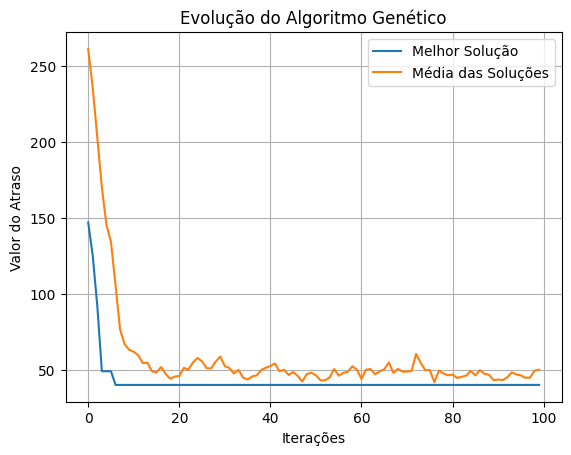

In [30]:
# Definição da classe PEV
class PEV:
    def __init__(self, tarefas, rotas):
        self.tarefas = tarefas
        self.rotas = rotas
        self.atraso = self.atraso_total()

    def atraso_total(self):
        atraso = 0
        for rota in self.rotas:
            tempo = 0
            for tarefa in rota:
                tempo += tarefa.prazo
                if tempo > tarefa.prazo:
                    atraso += tempo - tarefa.prazo
        return atraso

# Função para criar a população inicial
def populacao_inicial(pev: PEV, tamanho_populacao: int):
    populacao = []
    for _ in range(tamanho_populacao):
        novo_pev = copy.deepcopy(pev)
        todas_tarefas = copy.deepcopy(novo_pev.tarefas)
        random.shuffle(todas_tarefas)
        novo_pev.rotas = [todas_tarefas[i:i + 2] for i in range(0, len(todas_tarefas), 2)]
        populacao.append(novo_pev)
    return populacao

# Função para avaliar a população
def avaliar_populacao(populacao: list[PEV], elite):
    for x in populacao:
        x.atraso = x.atraso_total()
    populacao.sort(key=lambda x: x.atraso)

# Função de torneio para seleção
def torneio(populacao: list[PEV], elite: float, vies: float, rodadas: int):
    competidores = random.sample(populacao, rodadas)
    competidores.sort(key=lambda x: x.atraso)
    if random.random() < vies:
        return populacao.index(competidores[0])
    else:
        return populacao.index(random.choice(competidores))

# Função de mutação
def mutacao(x: PEV):
    if random.random() < 0.5:
        rota1, rota2 = random.sample(x.rotas, 2)
        if rota1 and rota2:
            idx1 = random.randint(0, len(rota1) - 1)
            idx2 = random.randint(0, len(rota2) - 1)
            rota1[idx1], rota2[idx2] = rota2[idx2], rota1[idx1]

# Função de cruzamento
def cruzamento_baseado_rotas(pai1: PEV, pai2: PEV):
    filho1 = copy.deepcopy(pai1)
    filho2 = copy.deepcopy(pai2)
    ponto_corte = random.randint(1, len(pai1.rotas) - 1)
    filho1.rotas = pai1.rotas[:ponto_corte] + pai2.rotas[ponto_corte:]
    filho2.rotas = pai2.rotas[:ponto_corte] + pai1.rotas[ponto_corte:]
    random.shuffle(filho1.rotas)
    random.shuffle(filho2.rotas)
    return filho1, filho2

# Função principal do algoritmo genético
def genetico(pev: PEV, tamanho_populacao: int, elite: float,
             vies: float, taxa_mutacao: float, rodadas: int, max_iter: int):
    proxima = populacao_inicial(pev, tamanho_populacao)
    avaliar_populacao(proxima, elite)
    iter = 0
    tamanho_elite = round(tamanho_populacao * elite)
    tamanho_mutacao = round(tamanho_populacao * taxa_mutacao)

    melhores_solucoes = []
    medias_solucoes = []

    while iter < max_iter:
        atual = copy.deepcopy(proxima)
        proxima[:tamanho_elite] = copy.deepcopy(atual[:tamanho_elite])

        for j in range(tamanho_elite, tamanho_elite + tamanho_mutacao):
            mutant_index = torneio(atual, elite, vies, rodadas)
            proxima[j] = copy.deepcopy(atual[mutant_index])
            mutacao(proxima[j])

        j = tamanho_elite + tamanho_mutacao
        while j < tamanho_populacao:
            x, y = selecao(atual, elite, vies, rodadas)
            z, w = cruzamento_baseado_rotas(atual[x], atual[y])
            proxima[j] = z
            j += 1
            if j < tamanho_populacao:
                proxima[j] = w
                j += 1

        avaliar_populacao(proxima, elite)

        melhores_solucoes.append(proxima[0].atraso)
        media_atraso = sum(individuo.atraso for individuo in proxima) / tamanho_populacao
        medias_solucoes.append(media_atraso)

        iter += 1
        print(f"({iter}): Melhor solução = {proxima[0].atraso}, Média = {media_atraso}")

    # Plotar o gráfico
    plt.plot(range(max_iter), melhores_solucoes, label="Melhor Solução")
    plt.plot(range(max_iter), medias_solucoes, label="Média das Soluções")
    plt.xlabel("Iterações")
    plt.ylabel("Valor do Atraso")
    plt.title("Evolução do Algoritmo Genético")
    plt.legend()
    plt.grid()
    plt.show()

    return proxima[0]

# Exemplo de uso
class Tarefa:
    def __init__(self, index, prazo):
        self.index = index
        self.prazo = prazo

tarefas = [Tarefa(i, random.randint(1, 100)) for i in range(10)]
rotas = [[tarefas[0], tarefas[1]], [tarefas[2], tarefas[3]]]  # Exemplo de rotas
pev = PEV(tarefas, rotas)
melhor_solucao = genetico(pev, tamanho_populacao=50, elite=0.05, vies=0.5, taxa_mutacao=0.3, rodadas=3, max_iter=100)

2.
Elabore um novo operador de cruzamento para o algoritmo genético.

(1): Melhor solução = 0, Média = 12.4
(2): Melhor solução = 0, Média = 11.3
(3): Melhor solução = 0, Média = 11.9
(4): Melhor solução = 0, Média = 11.3
(5): Melhor solução = 0, Média = 11.3
(6): Melhor solução = 0, Média = 12.1
(7): Melhor solução = 0, Média = 11.9
(8): Melhor solução = 0, Média = 11.2
(9): Melhor solução = 0, Média = 11.6
(10): Melhor solução = 0, Média = 11.3
(11): Melhor solução = 0, Média = 11.5
(12): Melhor solução = 0, Média = 11.2
(13): Melhor solução = 0, Média = 12.0
(14): Melhor solução = 0, Média = 11.3
(15): Melhor solução = 0, Média = 11.2
(16): Melhor solução = 0, Média = 11.5
(17): Melhor solução = 0, Média = 11.2
(18): Melhor solução = 0, Média = 11.6
(19): Melhor solução = 0, Média = 11.3
(20): Melhor solução = 0, Média = 12.1
(21): Melhor solução = 0, Média = 11.4
(22): Melhor solução = 0, Média = 11.6
(23): Melhor solução = 0, Média = 11.4
(24): Melhor solução = 0, Média = 11.6
(25): Melhor solução = 0, Média = 11.2
(26): Melhor solução = 0, Média = 

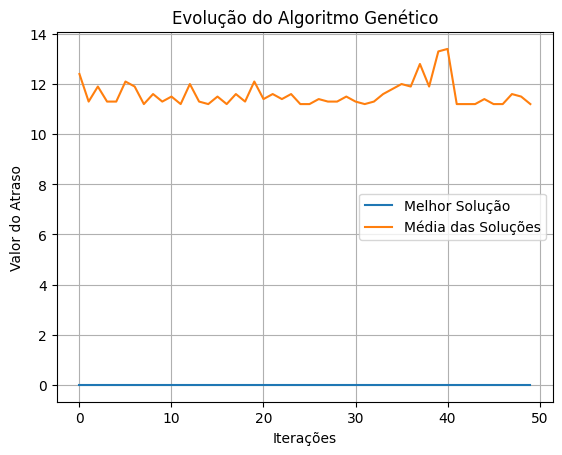

In [31]:
# Definição da classe Tarefa
class Tarefa:
    def __init__(self, index, duracao, veiculo_alocado=None):
        self.index = index
        self.duracao = duracao
        self.veiculo_alocado = veiculo_alocado

# Definição da classe PEV
class PEV:
    def __init__(self, tarefas, veiculos):
        self.tarefas = tarefas
        self.veiculos = veiculos
        self.rotas = [[] for _ in range(veiculos)]
        self.atraso = 0

    def atraso_total(self):
        atraso = 0
        for rota in self.rotas:
            tempo_total = sum(tarefa.duracao for tarefa in rota)
            if tempo_total > 10:  # Exemplo de limite de tempo por veículo
                atraso += tempo_total - 10
        return atraso

# Função para avaliar a população
def avaliar_populacao(populacao: list[PEV], elite):
    for x in populacao:
        x.atraso = x.atraso_total()
    populacao.sort(key=lambda x: x.atraso)

# Função de torneio para seleção
def torneio(populacao: list[PEV], elite: float, vies: float, rodadas: int):
    v = random.uniform(0, 1)
    iter = 1
    while iter <= rodadas:
        if v < vies:
            candidato = random.randrange(round(len(populacao) * elite))
        else:
            candidato = random.randrange(len(populacao))
        if iter == 1:
            melhor = candidato
        elif populacao[candidato].atraso < populacao[melhor].atraso:
            melhor = candidato
        iter += 1
    return melhor

# Função de seleção de pais
def selecao(populacao: list[PEV], elite: float, vies: float, rodadas: int):
    x = torneio(populacao, elite, vies, rodadas)
    y = torneio(populacao, elite, vies, rodadas)
    return x, y

# Função para verificar se todas as tarefas estão alocadas nas rotas
def checar_rotas(x: PEV):
    check = [0] * len(x.tarefas)
    for r in x.rotas:
        for t in r:
            check[t.index] = 1
    return sum(check) == len(x.tarefas)

# Função de mutação
def mutacao(x: PEV):
    v = random.uniform(0, 1)
    i = random.randrange(len(x.tarefas))
    j = random.randrange(len(x.tarefas))
    if v < 1/3:
        trocar(x, i, j)
    elif v < 2/3:
        mover(x, i, j)
    else:
        reverter(x, i, j)

# Funções auxiliares para mutação
def trocar(x: PEV, i: int, j: int):
    # Troca duas tarefas de lugar
    for rota in x.rotas:
        if i < len(rota) and j < len(rota):
            rota[i], rota[j] = rota[j], rota[i]

def mover(x: PEV, i: int, j: int):
    # Move uma tarefa de uma posição para outra
    for rota in x.rotas:
        if i < len(rota) and j < len(rota):
            tarefa = rota.pop(i)
            rota.insert(j, tarefa)

def reverter(x: PEV, i: int, j: int):
    # Reverte uma sub-rota
    for rota in x.rotas:
        if i < len(rota) and j < len(rota):
            rota[i:j+1] = reversed(rota[i:j+1])

# Novo operador de cruzamento: Cruzamento Baseado em Rotas
def cruzamento_baseado_rotas(pai1: PEV, pai2: PEV):
    # Cria cópias dos pais para gerar os filhos
    filho1 = copy.deepcopy(pai1)
    filho2 = copy.deepcopy(pai2)

    # Limpa as rotas dos filhos
    filho1.rotas = [[] for _ in range(filho1.veiculos)]
    filho2.rotas = [[] for _ in range(filho2.veiculos)]

    # Seleciona aleatoriamente algumas rotas do pai1 para o filho1
    for i in range(len(pai1.rotas)):
        if random.random() < 0.5:  # 50% de chance de herdar a rota
            filho1.rotas[i] = copy.deepcopy(pai1.rotas[i])

    # Seleciona aleatoriamente algumas rotas do pai2 para o filho2
    for i in range(len(pai2.rotas)):
        if random.random() < 0.5:  # 50% de chance de herdar a rota
            filho2.rotas[i] = copy.deepcopy(pai2.rotas[i])

    # Lista de tarefas já alocadas nos filhos
    tarefas_alocadas_filho1 = set()
    for rota in filho1.rotas:
        for tarefa in rota:
            tarefas_alocadas_filho1.add(tarefa.index)

    tarefas_alocadas_filho2 = set()
    for rota in filho2.rotas:
        for tarefa in rota:
            tarefas_alocadas_filho2.add(tarefa.index)

    # Tarefas não alocadas nos filhos
    tarefas_nao_alocadas_filho1 = [tarefa for tarefa in pai1.tarefas if tarefa.index not in tarefas_alocadas_filho1]
    tarefas_nao_alocadas_filho2 = [tarefa for tarefa in pai2.tarefas if tarefa.index not in tarefas_alocadas_filho2]

    # Alocar tarefas não alocadas nos filhos
    for tarefa in tarefas_nao_alocadas_filho1:
        rota_escolhida = random.choice(filho1.rotas)
        rota_escolhida.append(tarefa)

    for tarefa in tarefas_nao_alocadas_filho2:
        rota_escolhida = random.choice(filho2.rotas)
        rota_escolhida.append(tarefa)

    # Verificar viabilidade dos filhos
    if not checar_rotas(filho1) or not checar_rotas(filho2):
        print("Erro no cruzamento: Filhos inviáveis gerados.")

    return filho1, filho2

# Função principal do algoritmo genético
def genetico(pev: PEV, tamanho_populacao: int, elite: float,
             vies: float, taxa_mutacao: float, rodadas: int, max_iter: int):
    # Inicializa a população
    proxima = [copy.deepcopy(pev) for _ in range(tamanho_populacao)]
    avaliar_populacao(proxima, elite)
    iter = 0
    tamanho_elite = round(tamanho_populacao * elite)
    tamanho_mutacao = round(tamanho_populacao * taxa_mutacao)

    # Listas para armazenar a evolução da melhor solução e da média
    melhores_solucoes = []
    medias_solucoes = []

    while iter < max_iter:
        atual = copy.deepcopy(proxima)

        # Próxima geração mantém a elite atual
        proxima[:tamanho_elite] = copy.deepcopy(atual[:tamanho_elite])

        # Elementos mutantes da próxima população
        for j in range(tamanho_elite, tamanho_elite + tamanho_mutacao):
            mutant_index = torneio(atual, elite, vies, rodadas)
            proxima[j] = copy.deepcopy(atual[mutant_index])
            mutacao(proxima[j])

        # Elementos cruzados da próxima população
        j = tamanho_elite + tamanho_mutacao
        while j < tamanho_populacao:
            x, y = selecao(atual, elite, vies, rodadas)
            z, w = cruzamento_baseado_rotas(atual[x], atual[y])  # Usando o novo operador de cruzamento
            proxima[j] = z
            j += 1
            if j < tamanho_populacao:
                proxima[j] = w
                j += 1

        # Avaliação da população
        avaliar_populacao(proxima, elite)

        # Armazenar a melhor solução e a média das soluções
        melhores_solucoes.append(proxima[0].atraso)
        media_atraso = sum(individuo.atraso for individuo in proxima) / tamanho_populacao
        medias_solucoes.append(media_atraso)

        iter += 1
        print(f"({iter}): Melhor solução = {proxima[0].atraso}, Média = {media_atraso}")

    # Plotar o gráfico
    plt.plot(range(max_iter), melhores_solucoes, label="Melhor Solução")
    plt.plot(range(max_iter), medias_solucoes, label="Média das Soluções")
    plt.xlabel("Iterações")
    plt.ylabel("Valor do Atraso")
    plt.title("Evolução do Algoritmo Genético")
    plt.legend()
    plt.grid()
    plt.show()

    return proxima[0]

# Exemplo de uso
if __name__ == "__main__":
    # Cria uma instância do problema PEV
    tarefas = [Tarefa(i, random.randint(1, 5)) for i in range(10)]  # 10 tarefas com duração aleatória
    veiculos = 2  # 2 veículos
    pev = PEV(tarefas, veiculos)

    # Executa o algoritmo genético
    melhor_solucao = genetico(pev, tamanho_populacao=10, elite=0.2, vies=0.7, taxa_mutacao=0.1, rodadas=5, max_iter=50)